In [ ]:
library(dplyr)
library(circlize)
library(DT)
library(dplyr)
library(tibble)
library(ComplexHeatmap)
library(RColorBrewer)

In [ ]:
library(tidyverse)

## Read all phenotypes 

In [3]:
phe_113 <- readRDS('../../phe_113.rdata')

In [4]:
rownames(phe_113) <- phe_113$sample

## Read snp mutation of protein_coding genes

In [5]:
snp_mutation <- read.table('snp_mutation_matrix.txt',header=T,sep="\t",row.names = 1,colClasses=c("character"))
colnames(snp_mutation) <- paste0("9D",(colnames(snp_mutation) %>% strsplit("_") %>% sapply(function(x) x[[1]])))

In [22]:
snp_mutation_all = snp_mutation
snp_mutation_all[snp_mutation_all>0] = 1
snp_mutation_all[!snp_mutation_all>0] = 0
snp_mutation_all <- mutate_all(snp_mutation_all, function(x) as.numeric(x))
temp <- rowSums(snp_mutation_all)
snp_mutation <- snp_mutation[order(temp,decreasing = TRUE),]

In [8]:
column_title = "OncoPrint of SNP ProCod mutations in GCA "

alter_fun = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),
    Splice_Site = alter_graphic("rect", fill = "#284A7E"),
    Missense_Mutation = alter_graphic("rect", fill = "#FF5F00"),
    multi_hits = alter_graphic("rect",  fill = "#FFA200"),
    Nonsense_Mutation = alter_graphic("rect", fill = "#006C51"),
    Translation_Start_Site = alter_graphic("rect", fill = "yellow"),
    Nonstop_Mutation = alter_graphic("rect", fill = "#c17ec4"),
    Frame_Shift_Del = alter_graphic("rect", fill = "#A67200"),
    In_Frame_Del = alter_graphic("rect", fill = "#A65100"),
    Frame_Shift_Ins = alter_graphic("rect", fill = "#A65F00"),
    In_Frame_Ins = alter_graphic("rect", fill = "#A62F00")
)

In [9]:
col = c("Splice_Site" = "#284A7E", "Missense_Mutation" = "#FF5F00", "Translation_Start_Site"="yellow",
        "multi_hits" = "#FFA200","Nonsense_Mutation"="#006C51",'Nonstop_Mutation'="#A62F00",
        "In_Frame_Del" = "#A65100","Frame_Shift_Del"="#A67200",
       "Frame_Shift_Ins" = "#A65F00","In_Frame_Ins" = "#A62F00" )

In [10]:
phe_113$Stage[phe_113$Stage == 'IA'] = "I"
phe_113$Stage[phe_113$Stage == 'IB'] = "I"
phe_113$Stage[phe_113$Stage == 'IIA'] = "II"
phe_113$Stage[phe_113$Stage == 'IIIA'] = "III"
phe_113$Stage[phe_113$Stage == 'IIIB'] = "III"
phe_113$Stage[phe_113$Stage == 'IVA'] = "IV"

In [11]:
phe_113$differentiation[phe_113$differentiation == 'middle'] = 'Mid_High'
phe_113$differentiation[phe_113$differentiation == 'high'] = 'Mid_High'
phe_113$differentiation[phe_113$differentiation == 'low'] = 'Low'

In [12]:
col_anno = list(Year = colorRamp2(c(0,4), c("white", "antiquewhite4")),
                Sex = c("male" = "#875003", "female" = "#ff9603"),
                Age = colorRamp2(c(30,82), c("white", "darkorchid4")),
                Area = c("higharea" = "#8f9101", "lowarea" = "#d1d602"),
                Fam_hist = c("positive" = "#027d0f","negative"  = "#00bf14"),
                Diff = c("NoRecord" = "white","Low" = "#3334FF","Mid_High" = "#33FFFF"),
                Stage = c("NoRecord" = "white",'I' = "#fcd4d4","II"  = "#fc9797","III" = "#ff5757","IV" = "#960202"),
                Metastasis = c("NoRecord" = "white","positive" = "#5e338a","negative" = "#9a52e3"),
                Smoke = c("yes" ="#e373f0" ,"no" = "#87428f"),
                Alcohol = c("yes" ="#b880ed" ,"no" = "#7006d1")
               )

In [13]:
phe_113 %>% arrange(group) %>% rownames() -> order

In [14]:
#openxlsx::write.xlsx(x=snp_mutation_all[,order],file = "snp_mutation_all.xlsx",rowNames = TRUE)

## Waterfall For all samples

In [25]:
options(repr.plot.height=8,repr.plot.width=10)
#pdf(file = "Mutation_all.heatmap.pdf",height=10,width=12)
p = oncoPrint(snp_mutation[1:20,], alter_fun = alter_fun,col=col, column_title = column_title,
          row_order = rownames(snp_mutation[1:20,]),
        top_annotation = HeatmapAnnotation(
        Year = phe_113$year,
        Age = phe_113$age,
        Sex = phe_113$sex,  
        Area  = phe_113$area,
        Fam_hist = phe_113$family_history,
        Stage = phe_113$Stage,
        Metastasis = phe_113$Metastasis,
        Diff = phe_113$differentiation ,   
        Alcohol = phe_113$alcohol,
        Smoke = phe_113$smoke,
        col = col_anno
    ))
#dev.off()

All mutation types: Nonsense_Mutation, Missense_Mutation, Splice_Site,
multi_hits, In_Frame_Del, Frame_Shift_Ins, Frame_Shift_Del,
In_Frame_Ins.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.



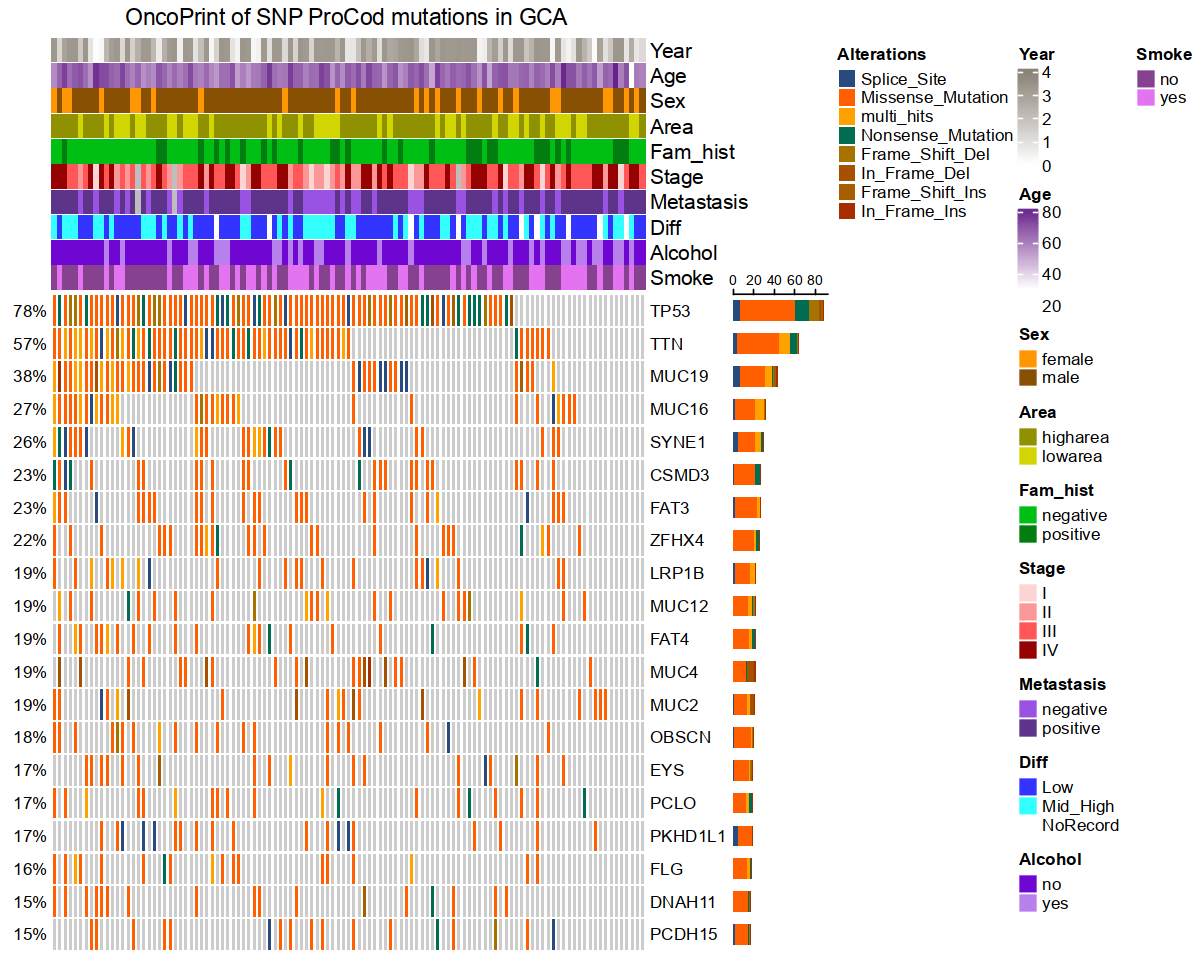

In [26]:
p

## plot for three groups

- ***Input data***

- Mutation data

In [28]:
head(snp_mutation[1:20,])

,9DW0282,9DW0356,9DW0073,9DW0030,9DW0219,9DW0003,9DW0092,9DW0270,9DW0184,9DW0185,⋯,9DW0251,9DW0076,9DW0032,9DW0014,9DW0110,9DW0147,9DW0198,9DW0350,9DW0161,9DW0064
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TP53,Nonsense_Mutation,,,Missense_Mutation,Missense_Mutation,Missense_Mutation,Missense_Mutation,Splice_Site,Missense_Mutation,,⋯,Nonsense_Mutation,Missense_Mutation,Missense_Mutation,In_Frame_Del,Missense_Mutation,Missense_Mutation,,Nonsense_Mutation,,Missense_Mutation
TTN,Missense_Mutation,,,,Nonsense_Mutation,Missense_Mutation,Missense_Mutation,Missense_Mutation,,Missense_Mutation,⋯,Missense_Mutation,multi_hits,,,Missense_Mutation,Missense_Mutation,,Missense_Mutation,,
MUC19,Missense_Mutation,,,Missense_Mutation,,,multi_hits,,,,⋯,Missense_Mutation,,,,,,,,,
MUC16,Missense_Mutation,,,,,,,Missense_Mutation,Missense_Mutation,Missense_Mutation,⋯,,,,,Missense_Mutation,,,,multi_hits,
SYNE1,Splice_Site,,,,,Missense_Mutation,Missense_Mutation,,,,⋯,,,,,multi_hits,Nonsense_Mutation,,multi_hits,Missense_Mutation,
CSMD3,,,,,,Missense_Mutation,,,Missense_Mutation,Missense_Mutation,⋯,Missense_Mutation,,,,Missense_Mutation,,,,,


- phenotype data 

In [69]:
head(phe_113)

,sample,name,ms_tumor,ms_normal,ms_ratio,status,year,group,group2,sex,age,area,smoke,alcohol,family_history,differentiation,number_of_lymph,Metastasis,TNM_stage,Stage
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
9DW0014,9DW0014,T14,1.120,0.550,2.0363636,2,2.909589,High,High,male,70,higharea,no,no,negative,Mid_High,6,positive,T3N2M0,III
9DW0002,9DW0002,T2,1.039,0.657,1.5814307,1,3.347945,High,High,male,64,higharea,no,no,negative,Low,5,positive,T2N2M0,III
9DW0003,9DW0003,T3,0.832,0.939,0.8860490,2,1.789041,Low,Low_Negative,female,65,higharea,no,no,negative,Low,12,positive,T3N3M0,IV
9DW0008,9DW0008,T8,2.966,0.820,3.6170732,1,3.342466,High,High,male,82,higharea,yes,yes,positive,Mid_High,9,positive,T3N3M0,IV
9DW0068,9DW0068,T068,1.022,1.077,0.9489322,1,3.326027,Low,Low_Negative,male,66,higharea,no,no,negative,NoRecord,0,negative,T3N0M0,II
9DW0071,9DW0071,T071,3.915,1.057,3.7038789,2,2.767123,High,High,male,66,lowarea,no,no,negative,Low,12,positive,T3N3M0,IV


In [37]:
high_all <- snp_mutation[,phe_113[colnames(snp_mutation_all),'group'] == 'High']
low_all <- snp_mutation[,phe_113[colnames(snp_mutation_all),'group'] == 'Low']
neg_all <- snp_mutation[,phe_113[colnames(snp_mutation_all),'group'] == 'negative']

high_all[high_all>0] = 1
high_all[!high_all>0] = 0
high_all <- mutate_all(high_all, function(x) as.numeric(x))

low_all[low_all>0] = 1
low_all[!low_all>0] = 0
low_all <- mutate_all(low_all, function(x) as.numeric(x))

neg_all[neg_all>0] = 1
neg_all[!neg_all>0] = 0
neg_all <- mutate_all(neg_all, function(x) as.numeric(x))

In [38]:
data_all_heatmap <- data.frame(high = rowSums(high_all)/ncol(high_all),low = rowSums(low_all)/ncol(low_all),
           neg = rowSums(neg_all)/ncol(neg_all))

In [39]:
head(phe_113)

,sample,name,ms_tumor,ms_normal,ms_ratio,status,year,group,group2,sex,age,area,smoke,alcohol,family_history,differentiation,number_of_lymph,Metastasis,TNM_stage,Stage
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
9DW0002,9DW0002,T2,1.039,0.657,1.581431,1,3.347945,High,High,male,64,higharea,no,no,negative,Low,5,positive,T2N2M0,III
9DW0003,9DW0003,T3,0.832,0.939,0.886049,2,1.789041,Low,Low_Negative,female,65,higharea,no,no,negative,Low,12,positive,T3N3M0,IV
9DW0008,9DW0008,T8,2.966,0.820,3.617073,1,3.342466,High,High,male,82,higharea,yes,yes,positive,Mid_High,9,positive,T3N3M0,IV
9DW0014,9DW0014,T14,1.120,0.550,2.036364,2,2.909589,High,High,male,70,higharea,no,no,negative,Mid_High,6,positive,T3N2M0,III
9DW0016,9DW0016,T16,NA,NA,0.000000,1,3.369863,negative,Low_Negative,male,67,lowarea,yes,yes,positive,Low,4,positive,T3N2M0,III
9DW0021,9DW0021,T21,NA,NA,0.000000,1,3.367123,negative,Low_Negative,male,60,higharea,no,no,positive,Mid_High,0,negative,T1bN0M0,I


In [40]:
head(snp_mutation)

,9DW0282,9DW0356,9DW0073,9DW0030,9DW0219,9DW0003,9DW0092,9DW0270,9DW0184,9DW0185,⋯,9DW0251,9DW0076,9DW0032,9DW0014,9DW0110,9DW0147,9DW0198,9DW0350,9DW0161,9DW0064
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TP53,Nonsense_Mutation,,,Missense_Mutation,Missense_Mutation,Missense_Mutation,Missense_Mutation,Splice_Site,Missense_Mutation,,⋯,Nonsense_Mutation,Missense_Mutation,Missense_Mutation,In_Frame_Del,Missense_Mutation,Missense_Mutation,,Nonsense_Mutation,,Missense_Mutation
TTN,Missense_Mutation,,,,Nonsense_Mutation,Missense_Mutation,Missense_Mutation,Missense_Mutation,,Missense_Mutation,⋯,Missense_Mutation,multi_hits,,,Missense_Mutation,Missense_Mutation,,Missense_Mutation,,
MUC19,Missense_Mutation,,,Missense_Mutation,,,multi_hits,,,,⋯,Missense_Mutation,,,,,,,,,
MUC16,Missense_Mutation,,,,,,,Missense_Mutation,Missense_Mutation,Missense_Mutation,⋯,,,,,Missense_Mutation,,,,multi_hits,
SYNE1,Splice_Site,,,,,Missense_Mutation,Missense_Mutation,,,,⋯,,,,,multi_hits,Nonsense_Mutation,,multi_hits,Missense_Mutation,
CSMD3,,,,,,Missense_Mutation,,,Missense_Mutation,Missense_Mutation,⋯,Missense_Mutation,,,,Missense_Mutation,,,,,


In [41]:
options(repr.plot.height=8,repr.plot.width=14)
#pdf(file = "Mutation_all_threegroups.heatmap.pdf",height=10,width=12)
p_all_mutation_heatmap = oncoPrint(snp_mutation[1:20,], alter_fun = alter_fun,col=col, column_title = column_title,
            row_order = rownames(snp_mutation[1:20,]),
            right_annotation = NULL,
            show_row_names = FALSE,
            column_split = phe_113[colnames(snp_mutation),'group'],
            show_pct = FALSE,
            width = unit(20, "cm"),
            top_annotation = HeatmapAnnotation(
                            Age = phe_113$age,
                            Sex = phe_113$sex,  
                            Area  = phe_113$area,
                            Fam_hist = phe_113$family_history,
                            Stage = phe_113$Stage,
                            Metastasis = phe_113$Metastasis,
                            Diff = phe_113$differentiation ,   
                            Alcohol = phe_113$alcohol,
                            Smoke = phe_113$smoke,
                            col = col_anno
                            )
             )+Heatmap(data_all_heatmap[1:20,],cluster_columns = FALSE,cluster_rows = FALSE, width = unit(1, "cm"))
#dev.off()

All mutation types: Nonsense_Mutation, Missense_Mutation, Splice_Site,
multi_hits, In_Frame_Del, Frame_Shift_Ins, Frame_Shift_Del,
In_Frame_Ins.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


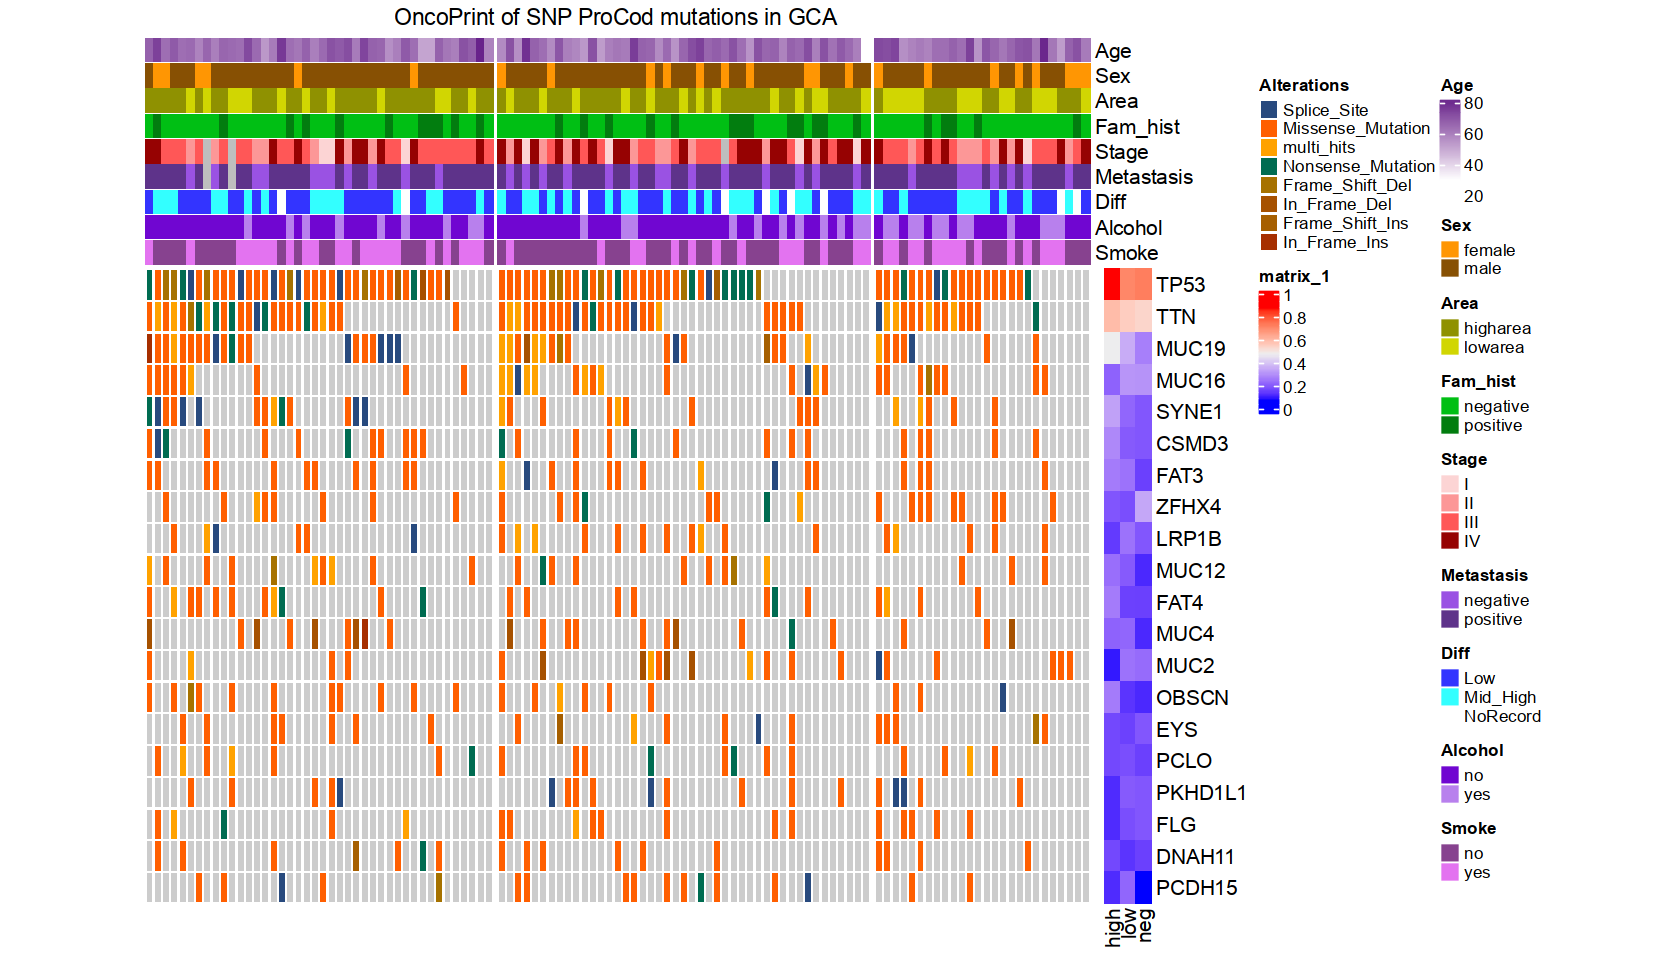

In [42]:
#pdf(file = "Mutation_all_threegroups.heatmap.pdf",height=8,width=14)
draw(p_all_mutation_heatmap)
#dev.off()

## Read the data of mutations on promoter

- ***Input data***

In [43]:
data_gene_upstream <- read.table('snp_pro_cod_upstream_matrix.txt',header=T,sep="\t",row.names = 1,colClasses=c("character"))
colnames(data_gene_upstream) <- paste0("9D",(colnames(data_gene_upstream) %>% strsplit("_") %>% sapply(function(x) x[[1]])))

In [62]:
rownames(phe_113) %>% setdiff(colnames(data_gene_upstream))

[1] "9DW0021"

In [64]:
data_gene_upstream$`9DW0021` = ''

In [66]:
column_title = "OncoPrint of SNP Gene_upstream mutations in GCA "

alter_fun_promoter = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),
    upstream_gene_variant = alter_graphic("rect", fill = "#FF5F00"),
    multi_hits = alter_graphic("rect",  fill = "#FFA200")
)

In [67]:
col_promoter = c("upstream_gene_variant" = "#FF5F00", 
        "multi_hits" = "#FFA200" )

## Protein coding upstream for all samples

In [68]:
high_promoter <- data_gene_upstream[,phe_113[colnames(data_gene_upstream),'group'] == 'High']
low_promoter <- data_gene_upstream[,phe_113[colnames(data_gene_upstream),'group'] == 'Low']
neg_promoter <- data_gene_upstream[,phe_113[colnames(data_gene_upstream),'group'] == 'negative']

high_promoter[high_promoter>0] = 1
high_promoter[!high_promoter>0] = 0
high_promoter <- mutate_all(high_promoter, function(x) as.numeric(x))

low_promoter[low_promoter>0] = 1
low_promoter[!low_promoter>0] = 0
low_promoter <- mutate_all(low_promoter, function(x) as.numeric(x))

neg_promoter[neg_promoter>0] = 1
neg_promoter[!neg_promoter>0] = 0
neg_promoter <- mutate_all(neg_promoter, function(x) as.numeric(x))

In [69]:
data_promoter_heatmap <- data.frame(high = rowSums(high_promoter)/ncol(high_promoter),low = rowSums(low_promoter)/ncol(low_promoter),
           neg = rowSums(neg_promoter)/ncol(neg_promoter))
scale_rows <- function (x) 
{
    m = apply(x, 1, mean, na.rm = T)
    s = apply(x, 1, sd, na.rm = T)
    return((x - m)/s)
}
data_promoter_heatmap_scaled <- scale_rows(data_promoter_heatmap)

In [70]:
options(repr.plot.height=8,repr.plot.width=14)
#pdf(file = "Mutation_promoter_threegroups.heatmap.pdf",height=10,width=12)
p_promoter_mutation2 = oncoPrint(data_gene_upstream[1:20,], alter_fun = alter_fun_promoter,col=col_promoter, column_title = column_title,
            row_order = rownames(data_gene_upstream)[1:20],
            right_annotation = NULL,
            column_split = phe_113[colnames(data_gene_upstream),'group'],
            show_pct = FALSE,
                                   show_row_names = FALSE,
            width = unit(20, "cm"),
            top_annotation = HeatmapAnnotation(
                            Age = phe_113$age,
                            Sex = phe_113$sex,  
                            Area  = phe_113$area,
                            Fam_hist = phe_113$family_history,
                            Stage = phe_113$Stage,
                            Metastasis = phe_113$Metastasis,
                            Diff = phe_113$differentiation ,   
                            Alcohol = phe_113$alcohol,
                            Smoke = phe_113$smoke,
                            col = col_anno
                            )
             )+Heatmap(data_promoter_heatmap[1:20,],cluster_columns = FALSE,cluster_rows = FALSE, width = unit(1, "cm"))
#dev.off()

All mutation types: upstream_gene_variant, multi_hits.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


In [72]:
pdf(file = "Mutation_promoter_threegroups.heatmap.pdf",height=8,width=14)
p_promoter_mutation2
dev.off()

png 
  2

## plot with selected genes by different pathway

In [4]:
GO_data <- readRDS(file = "/disk1/pengweixing/esophageal/12.RNAseq_hg38/04.GO/All.GO.Rdata")

In [ ]:
library(GO.db)

In [21]:
goterms <- AnnotationDbi::Ontology(GO.db::GOTERM)

In [38]:
GO.db::GOTERM

TERM map for GO (object of class "GOTermsAnnDbBimap")

In [41]:
columns(GO.db)

[1] "DEFINITION" "GOID"       "ONTOLOGY"   "TERM"

In [ ]:
library(org.Hs.eg.db)

In [55]:
go2gene <- suppressMessages(AnnotationDbi::mapIds(org.Hs.eg.db, keys=names(goterms), column= c("SYMBOL"),
                              keytype="GOALL", multiVals='list'))

In [13]:
columns(GO.db)

[1] "DEFINITION" "GOID"       "ONTOLOGY"   "TERM"

In [20]:
GO.db 


Please see: help('select') for usage information



GODb object:
| GOSOURCENAME: Gene Ontology
| GOSOURCEURL: http://current.geneontology.org/ontology/go-basic.obo
| GOSOURCEDATE: 2022-07-01
| Db type: GODb
| package: AnnotationDbi
| DBSCHEMA: GO_DB
| GOEGSOURCEDATE: 2022-Sep12
| GOEGSOURCENAME: Entrez Gene
| GOEGSOURCEURL: ftp://ftp.ncbi.nlm.nih.gov/gene/DATA
| DBSCHEMAVERSION: 2.1

In [56]:
goAnno <- stack(go2gene)

In [57]:
head(goAnno)

,values,ind
,<chr>,<fct>
1,NA,GO:0000001
2,PARP1,GO:0000002
3,SLC25A4,GO:0000002
4,DNA2,GO:0000002
5,TYMP,GO:0000002
6,ENDOG,GO:0000002


In [58]:
colnames(goAnno) <- c("ENTREZID", "GOALL")

In [59]:
goAnno <- unique(goAnno[!is.na(goAnno[,1]), ])

In [60]:
goAnno$ONTOLOGYALL <- goterms[goAnno$GOALL]

In [105]:
go_term <- get_GO2TERM_table()

In [95]:
colnames(go_term) <- c('GOALL','Term')

In [98]:
All_GO_data <- right_join(x = goAnno,y =go_term, by = 'GOALL')

In [99]:
head(All_GO_data)

,ENTREZID,GOALL,ONTOLOGYALL,Term
,<chr>,<chr>,<chr>,<chr>
1,PARP1,GO:0000002,BP,mitochondrial genome maintenance
2,SLC25A4,GO:0000002,BP,mitochondrial genome maintenance
3,DNA2,GO:0000002,BP,mitochondrial genome maintenance
4,TYMP,GO:0000002,BP,mitochondrial genome maintenance
5,ENDOG,GO:0000002,BP,mitochondrial genome maintenance
6,LIG3,GO:0000002,BP,mitochondrial genome maintenance


In [101]:
write.table(x = All_GO_data,file = "all_GO.txt",sep="\t",quote = F,row.names = F)

In [62]:
get_GO_Env <- function () {
    if (!exists(".GO_clusterProfiler_Env", envir = .GlobalEnv)) {
        pos <- 1
        envir <- as.environment(pos)
        assign(".GO_clusterProfiler_Env", new.env(), envir=envir)
    }
    get(".GO_clusterProfiler_Env", envir = .GlobalEnv)
}

In [ ]:
write.table(toTable(GOTERM),file = "all.GO.txt",)

In [103]:
GOTERM

TERM map for GO (object of class "GOTermsAnnDbBimap")

In [724]:
select_gene <- read.table('pathway_select.gene.txt',header=F)

In [725]:
snp_mutation_select <- snp_mutation_all[select_gene$V2,]

In [404]:
Bcell.diff <- read.table('../../../12.RNAseq/Bcell.differentiation',header=T)$x

In [405]:
Tcell.prol <- read.table('../../../12.RNAseq/Tcell.proliferation.txt',header=T)$x

In [406]:
epi.prol <- read.table('../../../12.RNAseq/epithelial.proliferation.txt',header=T)$x

In [407]:
mes.prol <- read.table('../../../12.RNAseq/mesenchymal.proliferation.txt',header=T)$x

In [513]:
his_mod <- read.table('../../../12.RNAseq/Histone_modifcation.txt',header=T)$SYMBOL

In [727]:
align_to <- list()

In [728]:
for(each in unique(select_gene$V1)){
    align_to[[each]]  = grep(each,select_gene$V1)
}

In [731]:
panel_fun = function(index, nm) {
    grid.rect(gp = gpar(fill = index, col = NA), just = "right")
    grid.text(unique(select_gene[index,]$V1), -1, 0.5,just = "right")
}

In [771]:
high_select <- snp_mutation_select[,phe_113[colnames(snp_mutation_select),'group'] == 'High']
low_select <- snp_mutation_select[,phe_113[colnames(snp_mutation_select),'group'] == 'Low']
neg_select <- snp_mutation_select[,phe_113[colnames(snp_mutation_select),'group'] == 'negative']

high_select[high_select>0] = 1
high_select[!high_select>0] = 0
high_select <- mutate_all(high_select, function(x) as.numeric(x))

low_select[low_select>0] = 1
low_select[!low_select>0] = 0
low_select <- mutate_all(low_select, function(x) as.numeric(x))

neg_select[neg_select>0] = 1
neg_select[!neg_select>0] = 0
neg_select <- mutate_all(neg_select, function(x) as.numeric(x))

In [791]:
data_select_heatmap <- data.frame(high = rowSums(high_select)/ncol(high_select),low = rowSums(low_select)/ncol(low_select),
           neg = rowSums(neg_select)/ncol(neg_select))
scale_rows <- function (x) 
{
    m = apply(x, 1, mean, na.rm = T)
    s = apply(x, 1, sd, na.rm = T)
    return((x - m)/s)
}
data_select_heatmap_scaled <- scale_rows(data_select_heatmap)

In [840]:
options(repr.plot.height=8,repr.plot.width=14)
pdf(file = "Mutation_select_threegroups.heatmap.pdf",height=10,width=12)
p2 = oncoPrint(snp_mutation_select, alter_fun = alter_fun,col=col, column_title = column_title,
            row_order = rownames(snp_mutation_select),
            right_annotation = NULL,
               show_row_names = FALSE,
            column_split = phe_113[colnames(snp_mutation_select),'group'],
            show_pct = FALSE,
            width = unit(20, "cm"),
            top_annotation = HeatmapAnnotation(
                            Age = phe_113$age,
                            Sex = phe_113$sex,  
                            Area  = phe_113$area,
                            Fam_hist = phe_113$family_history,
                            Stage = phe_113$Stage,
                            Metastasis = phe_113$Metastasis,
                            Diff = phe_113$differentiation ,   
                            Alcohol = phe_113$alcohol,
                            Smoke = phe_113$smoke,
                            col = col_anno
                            ),
            left_annotation = rowAnnotation(foo = anno_block(
            align_to = align_to,
            panel_fun = panel_fun,
            width = unit(2, "mm"),
                                                            )
                                            )
             )+Heatmap(data_select_heatmap,cluster_columns = FALSE,cluster_rows = FALSE, width = unit(1, "cm"))
dev.off()

All mutation types: In_Frame_Del, Frame_Shift_Del, Missense_Mutation,
Splice_Site, Translation_Start_Site, In_Frame_Ins, Frame_Shift_Ins,
Nonsense_Mutation, multi_hits.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


png 
  2

In [848]:
pdf(file = "Mutation_select_threegroups.heatmap.pdf",height=8,width=14)
draw(p2)
dev.off()

png 
  2

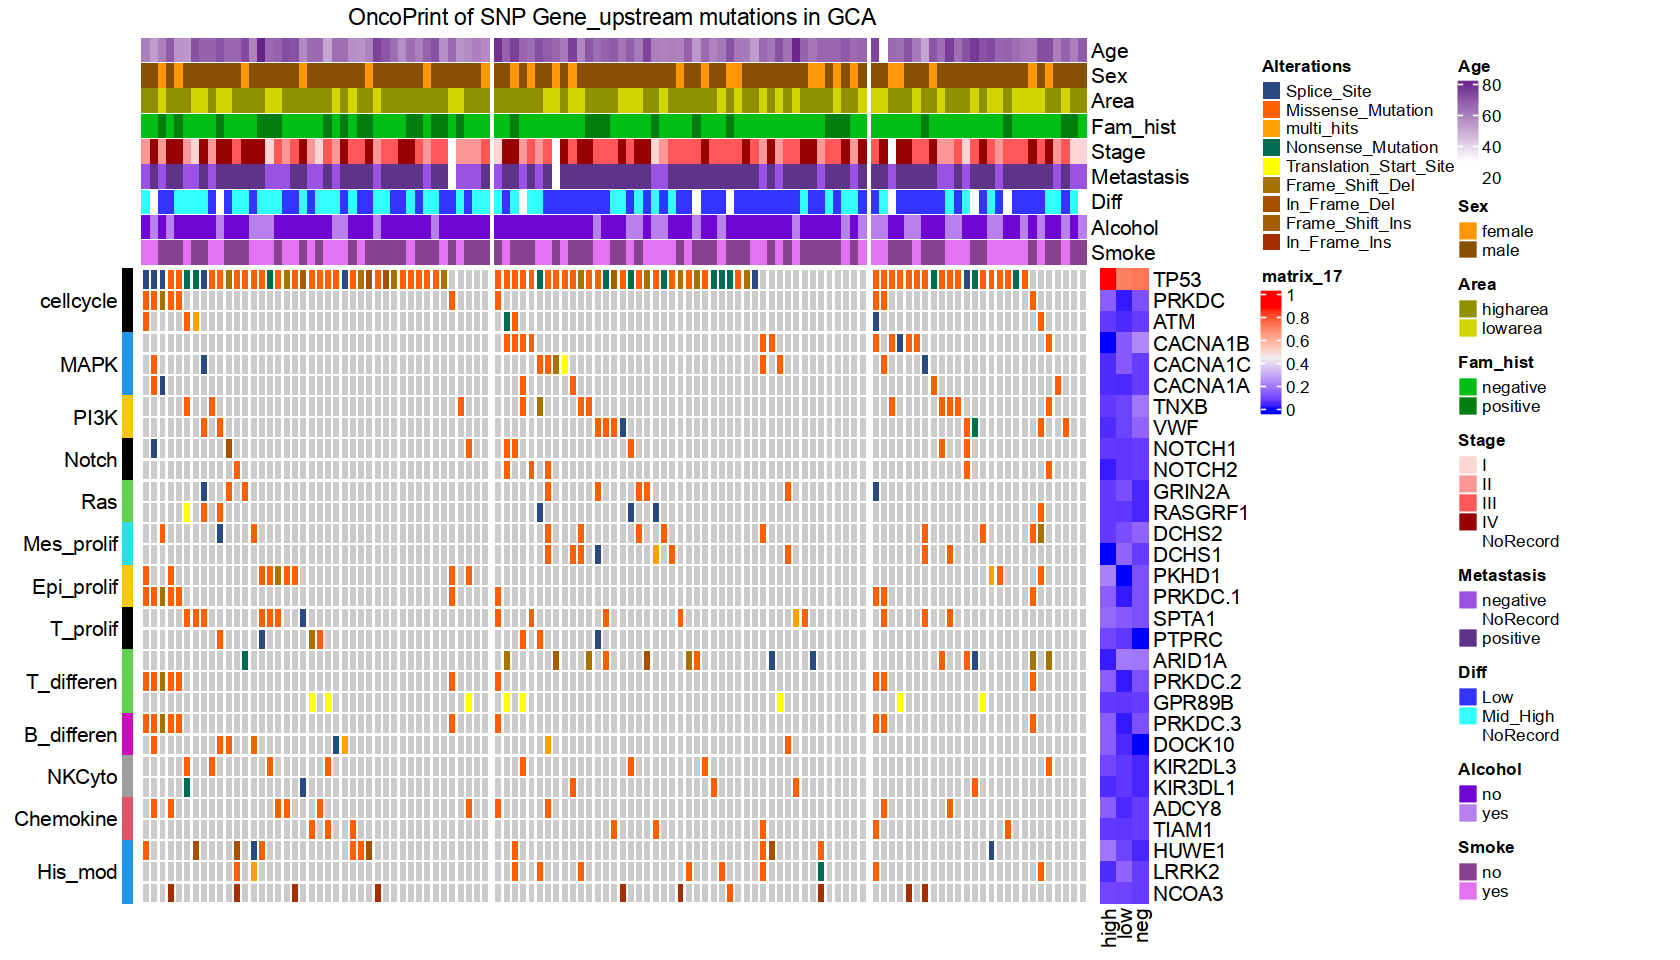

In [909]:
p2